## **Plot of Total Distance Travelled vs Iteration**

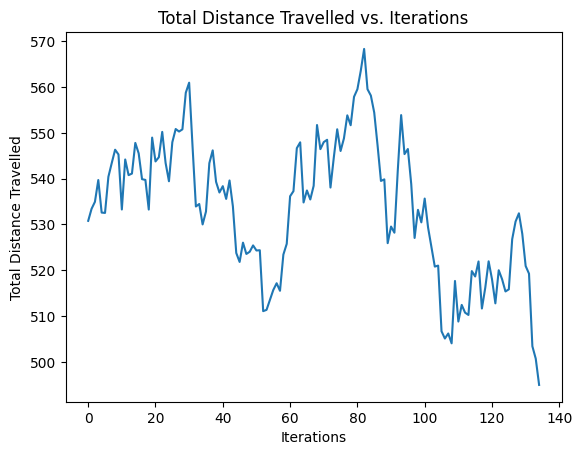

Optimal allocation of passengers for each taxi: 

taxi1: ['passenger39', 'passenger16', 'passenger34']
taxi2: ['passenger20', 'passenger38', 'passenger5']
taxi3: ['passenger40', 'passenger13', 'passenger17']
taxi4: ['passenger7', 'passenger10', 'passenger15']
taxi5: ['passenger8', 'passenger35', 'passenger3']
taxi6: ['passenger22', 'passenger14', 'passenger33']
taxi7: ['passenger37', 'passenger21', 'passenger11']
taxi8: ['passenger19', 'passenger1', 'passenger41']
taxi9: ['passenger32', 'passenger24', 'passenger6']
taxi10: ['passenger36', 'passenger29', 'passenger28']
taxi11: ['passenger2', 'passenger4', 'passenger23']
taxi12: ['passenger18', 'passenger27', 'passenger30']
taxi13: ['passenger25', 'passenger12', 'passenger42']
taxi14: ['passenger26', 'passenger31', 'passenger9']

Total distance travelled by all the taxis: 494.9738462029298


In [106]:
# Ride Sharing Problem using Simulated Annealing

import random
import math
import matplotlib.pyplot as plt

# Pickup and Drop-off Locations of the passengers
passenger_locations = {
    'passenger1': {'start': (1,1), 'end': (3,3)},
    'passenger2': {'start': (2,2), 'end': (4,4)},
    'passenger3': {'start': (3,3), 'end': (5,5)},
    'passenger4': {'start': (4,4), 'end': (6,6)},
    'passenger5': {'start': (1,5), 'end': (8,3)},
    'passenger6': {'start': (2,6), 'end': (2,0)},
    'passenger7': {'start': (7,4), 'end': (4,2)},
    'passenger8': {'start': (2,3), 'end': (7,9)},
    'passenger9': {'start': (4,7), 'end': (5,2)},
    'passenger10': {'start': (7,9), 'end': (4,5)}
}

# Location of the taxis
taxi_locations = {
    'taxi1': (1,0),
    'taxi2': (7,8),
    'taxi3': (2,1),
    'taxi4': (3,2)
}


# Pickup and Drop-off locations of passengers
passenger_locations = {'passenger1': {'start': (3, 4), 'end': (8, 0)}, 'passenger2': {'start': (0, 3), 'end': (7, 3)}, 'passenger3': {'start': (7, 7), 'end': (2, 0)}, 'passenger4': {'start': (6, 3), 'end': (6, 2)}, 'passenger5': {'start': (1, 3), 'end': (0, 1)}, 'passenger6': {'start': (8, 3), 'end': (4, 8)}, 'passenger7': {'start': (8, 3), 'end': (9, 7)}, 'passenger8': {'start': (4, 4), 'end': (1, 0)}, 'passenger9': {'start': (0, 5), 'end': (9, 6)}, 'passenger10': {'start': (5, 6), 'end': (5, 5)}, 'passenger11': {'start': (9, 6), 'end': (2, 2)}, 'passenger12': {'start': (5, 7), 'end': (5, 6)}, 'passenger13': {'start': (3, 7), 'end': (5, 1)}, 'passenger14': {'start': (1, 0), 'end': (1, 3)}, 'passenger15': {'start': (3, 9), 'end': (2, 6)}, 'passenger16': {'start': (7, 8), 'end': (9, 9)}, 'passenger17': {'start': (1, 1), 'end': (6, 4)}, 'passenger18': {'start': (3, 0), 'end': (5, 7)}, 'passenger19': {'start': (3, 9), 'end': (1, 4)}, 'passenger20': {'start': (8, 4), 'end': (2, 5)}, 'passenger21': {'start': (2, 6), 'end': (6, 5)}, 'passenger22': {'start': (3, 2), 'end': (5, 1)}, 'passenger23': {'start': (4, 3), 'end': (8, 3)}, 'passenger24': {'start': (0, 8), 'end': (9, 4)}, 'passenger25': {'start': (3, 5), 'end': (9, 3)}, 'passenger26': {'start': (6, 6), 'end': (8, 0)}, 'passenger27': {'start': (0, 7), 'end': (8, 3)}, 'passenger28': {'start': (1, 6), 'end': (4, 6)}, 'passenger29': {'start': (6, 9), 'end': (2, 7)}, 'passenger30': {'start': (3, 6), 'end': (9, 8)}, 'passenger31': {'start': (5, 2), 'end': (3, 6)}, 'passenger32': {'start': (8, 1), 'end': (9, 8)}, 'passenger33': {'start': (9, 1), 'end': (3, 8)}, 'passenger34': {'start': (2, 9), 'end': (4, 1)}, 'passenger35': {'start': (0, 0), 'end': (5, 0)}, 'passenger36': {'start': (0, 8), 'end': (9, 0)}, 'passenger37': {'start': (9, 6), 'end': (6, 8)}, 'passenger38': {'start': (4, 7), 'end': (2, 1)}, 'passenger39': {'start': (2, 9), 'end': (2, 7)}, 'passenger40': {'start': (0, 1), 'end': (0, 5)}, 'passenger41': {'start': (9, 2), 'end': (8, 7)}, 'passenger42': {'start': (4, 3), 'end': (8, 9)}}

# Location of the taxis
taxi_locations = {'taxi1': (9, 5), 'taxi2': (0, 8), 'taxi3': (6, 8), 'taxi4': (9, 9), 'taxi5': (0, 0), 'taxi6': (0, 4), 'taxi7': (8, 5), 'taxi8': (2, 5), 'taxi9': (7, 3), 'taxi10': (6, 9), 'taxi11': (9, 5), 'taxi12': (5, 6), 'taxi13': (1, 7), 'taxi14': (8, 3), 'taxi15': (0, 1), 'taxi16': (5, 3), 'taxi17': (4, 4), 'taxi18': (1, 2), 'taxi19': (7, 6), 'taxi20': (2, 9), 'taxi21': (7, 2), 'taxi22': (6, 3), 'taxi23': (7, 0), 'taxi24': (6, 1), 'taxi25': (7, 5)}


taxi_capacity = 3           # Capacity of passengers in each taxi

# Calculating the distance for individual taxi
def total_distance(route):
    distance = 0
    for i in range(len(route)-1):
        distance += math.dist(route[i], route[i+1])
    return distance

# Objective function (total distance travelled by all the taxis) which is to be minimized
def objective_function(solution):
    total_distance_travelled = 0
    for taxi in solution:
        taxi_location = taxi_locations[taxi]
        taxi_route = [taxi_location]
        passengers = solution[taxi]
        for passenger in passengers:
            passenger_start = passenger_locations[passenger]['start']
            passenger_end = passenger_locations[passenger]['end']
            taxi_route.append(passenger_start)
            taxi_route.append(passenger_end)
        taxi_route.append(taxi_location)
        total_distance_travelled += total_distance(taxi_route)
    return total_distance_travelled

# Randomly select an initial solution which will be optimized while doing simulated annealing
def generate_initial_solution():
    passengers = list(passenger_locations.keys())
    random.shuffle(passengers)
    solution = {}
    for i in range(0, len(passengers), taxi_capacity):
        taxi = 'taxi' + str(i // taxi_capacity + 1)
        solution[taxi] = passengers[i:i+taxi_capacity]
    return solution

# Implement simulated annealing
def simulated_annealing(initial_solution, temperature, cooling_rate):
    
    current_solution = initial_solution
    best_solution = current_solution
    distances = []

    while temperature > 1:
        new_solution = current_solution.copy()
        
        # Generate a new solution by swapping passengers between taxis
        taxi1 = random.choice(list(new_solution.keys()))
        taxi2 = random.choice(list(new_solution.keys()))
        while taxi1 == taxi2:
            taxi2 = random.choice(list(new_solution.keys()))
        passenger1 = random.choice(new_solution[taxi1])
        passenger2 = random.choice(new_solution[taxi2])
        new_solution[taxi1].remove(passenger1)
        new_solution[taxi2].remove(passenger2)
        new_solution[taxi1].append(passenger2)
        new_solution[taxi2].append(passenger1)

        # Calculate the cost of the new solution using objective function defined
        current_cost = objective_function(current_solution)
        new_cost = objective_function(new_solution)
        distances.append(objective_function(current_solution))

        # Accept the new solution if it is better than the current solution
        if new_cost < current_cost:
            current_solution = new_solution

            # Compare the acceptance probability with a random number generated between 0 and 1
            if objective_function(current_solution) < objective_function(best_solution):
                best_solution = current_solution

        # Accept the new solution based on acceptance probability and random number generated
        else:
            acceptance_probability = math.exp(-(new_cost - current_cost) / temperature)
            if random.random() < acceptance_probability:
                current_solution = new_solution
        
        # Reduce the temperature
        temperature *= cooling_rate

    # Plot the total distance travelled during all the iterations
    plt.plot(distances)
    plt.title('Total Distance Travelled vs. Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Total Distance Travelled')
    plt.show()

    return best_solution

# Defining the parameters for simulated annealing
initial_solution = generate_initial_solution()
temperature = 1000
cooling_rate = 0.95

best_solution = simulated_annealing(initial_solution, temperature, cooling_rate)

print('Optimal allocation of passengers for each taxi: \n')
for taxi in best_solution:
    print(taxi + ': ' + str(best_solution[taxi]))
print('\nTotal distance travelled by all the taxis: ' + str(objective_function(best_solution)))